# ENSF-612 Assignment 1

## Question 1

#### Original Code

In [0]:
from collections import defaultdict
text_file = sc.textFile("FileStore/assignment_1/file.txt")
counts = text_file.flatMap(lambda line: line.split(" ")).map(lambda word: (word, 1)).collect()

key_val = defaultdict(int)

for item in counts:
  key = item[0]
  val = item[1]
  key_val[key] += int(val)

filtered_key_val = dict()

for k, v in key_val.items():
  if v >= 100:
    filtered_key_val[k] = v

return filtered_key_val

File "<command-2150466413904983>" , line 18 
 return filtered_key_val 
 ^
 SyntaxError : 'return' outside function

#### Issues

1. While creating the RDD from the text file, no minimum number of partitions is provided, and hence by default two partitions are created. We can supply a bigger value to ensure more partitions are created. By creating more partitions, we can utilize all of the cores available in the cluster.

2. We can also optionally cache the RDD, so that RDD can persist in the memory for the next time we query it.

3. The above code snippet uses RDD to read a text file, uses flatMap and map transformations, but computes the word count and further operations using for loops on python dictionaries. This may not work very well for a file size of 100GB, as it doesn't utilize the power of spark.

4. The above code snippet "returns" a variable on Line 18. However, this code is not contained in a function. So "return" does not make sense and would throw a syntax error.

#### Updated Code

In [0]:
# increased number of partitions
text_file = sc.textFile("FileStore/assignment_1/file.txt", 10)

# caching the rdd
text_file.cache()

# keeping counts as an rdd by not using collect()
counts = text_file.flatMap(lambda line: line.split(" ")).map(lambda word: (word, 1))

# computing key_val using rdd transformations rather than for loop
key_val = counts.reduceByKey(lambda a, b: a+b)

# computing filtered_key_val using rdd transformations rather than for loop
filtered_key_val = key_val.filter(lambda x: x[1] >= 100)

# output the rdd as a list at the end 
filtered_key_val.collect()

Out[2]: [('odio', 325),
 ('feugiat', 273),
 ('fermentum', 207),
 ('mattis', 277),
 ('', 499),
 ('urna', 348),
 ('at', 568),
 ('aenean', 177),
 ('mi', 314),
 ('condimentum', 128),
 ('Nunc', 117),
 ('lectus', 345),
 ('ullamcorper', 227),
 ('cras', 220),
 ('convallis', 202),
 ('adipiscing', 354),
 ('ut', 659),
 ('et', 581),
 ('gravida', 285),
 ('enim', 524),
 ('tristique', 305),
 ('pulvinar', 220),
 ('viverra', 455),
 ('facilisis', 234),
 ('velit', 290),
 ('euismod', 190),
 ('imperdiet', 194),
 ('arcu', 441),
 ('accumsan', 165),
 ('blandit', 189),
 ('Et', 112),
 ('nam', 112),
 ('magna', 220),
 ('leo', 249),
 ('integer', 230),
 ('augue', 203),
 ('in', 811),
 ('diam', 438),
 ('amet', 808),
 ('pellentesque', 475),
 ('duis', 223),
 ('sollicitudin', 157),
 ('cursus', 295),
 ('felis', 172),
 ('rhoncus', 181),
 ('Sit', 146),
 ('metus', 117),
 ('commodo', 272),
 ('lobortis', 134),
 ('eget.', 129),
 ('facilisi', 138),
 ('amet.', 127),
 ('habitant', 107),
 ('sit', 790),
 ('tempor', 169),
 ('massa', 422),
 ('egestas', 515),
 ('Amet', 124),
 ('posuere', 177),
 ('libero', 187),
 ('In', 143),
 ('Vitae', 118),
 ('consequat', 180),
 ('turpis', 360),
 ('in.', 175),
 ('morbi', 372),
 ('porta', 105),
 ('tempus', 165),
 ('consectetur', 258),
 ('vitae', 552),
 ('malesuada', 259),
 ('ut.', 121),
 ('tellus', 392),
 ('At', 118),
 ('varius', 182),
 ('etiam', 176),
 ('at.', 104),
 ('interdum', 193),
 ('dictum', 153),
 ('venenatis', 168),
 ('quisque', 128),
 ('bibendum', 222),
 ('sapien', 152),
 ('maecenas', 183),
 ('justo', 133),
 ('phasellus', 117),
 ('mauris', 420),
 ('ultricies', 236),
 ('neque', 366),
 ('Eget', 119),
 ('non', 422),
 ('id', 690),
 ('elit', 294),
 ('elementum', 318),
 ('vel', 350),
 ('laoreet', 167),
 ('nisl', 328),
 ('vitae.', 124),
 ('eleifend', 123),
 ('sed.', 172),
 ('viverra.', 107),
 ('risus', 403),
 ('aliquet', 343),
 ('Id', 141),
 ('Egestas', 102),
 ('sed', 964),
 ('nulla', 429),
 ('nisi', 209),
 ('est', 296),
 ('sit.', 149),
 ('vulputate', 267),
 ('nibh', 343),
 ('scelerisque', 298),
 ('ornare', 246),
 ('congue', 127),
 ('lacus', 279),
 ('fringilla', 145),
 ('nunc', 579),
 ('purus', 334),
 ('et.', 119),
 ('erat', 152),
 ('sodales', 111),
 ('Sed', 175),
 ('sem', 178),
 ('pharetra', 268),
 ('nullam', 159),
 ('vestibulum', 218),
 ('orci', 287),
 ('lorem', 215),
 ('Ut', 114),
 ('ultrices', 293),
 ('nec', 258),
 ('senectus', 113),
 ('eu', 478),
 ('pretium', 244),
 ('placerat', 153),
 ('dignissim', 211),
 ('auctor', 178),
 ('ac', 476),
 ('fames', 108),
 ('ipsum', 231),
 ('nunc.', 105),
 ('quam', 305),
 ('faucibus', 404),
 ('molestie', 149),
 ('iaculis', 130),
 ('quis', 483),
 ('sagittis', 225),
 ('porttitor', 172),
 ('eget', 657),
 ('dolor', 231),
 ('aliquam', 428),
 ('dui', 234),
 ('suspendisse', 200),
 ('a', 335),
 ('proin', 229),
 ('tortor', 345),
 ('netus', 106),
 ('donec', 230),
 ('id.', 125),
 ('tincidunt', 385),
 ('volutpat', 341),
 ('semper', 208)]

## Question 2

#### Resolving Dependencies

In this step, we install and import all the required modules, and download the data required for nltk

In [0]:
!pip install nltk beautifulsoup4

import nltk
import string
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup


nltk.download('punkt')
nltk.download('stopwords')

Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (3.6.5)
Requirement already satisfied: beautifulsoup4 in /databricks/python3/lib/python3.8/site-packages (4.10.0)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk) (8.0.3)
Requirement already satisfied: regex>=2021.8.3 in /databricks/python3/lib/python3.8/site-packages (from nltk) (2021.10.8)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk) (4.62.3)
Requirement already satisfied: soupsieve>1.2 in /databricks/python3/lib/python3.8/site-packages (from beautifulsoup4) (2.2.1)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
Out[3]: True

#### Importing CSV files

The csv files are uploaded to DBFS. We use the below function to import csv for all three programming languages.

In [0]:
def read_CSV_to_DF(filepath):
  """
  Read a csv file into a spark dataframe
  """
  df = (spark.read
        .option("multiline", "true")
        .option("quote", '"')
        .option("header", "true")
        .option("escape", "\\")
        .option("escape", '"')
        .csv(filepath)
        )
  
  return df


# importing files from DBFS
df_jv = read_CSV_to_DF('/FileStore/assignment_1/SO_Java.csv')
df_py = read_CSV_to_DF('/FileStore/assignment_1/SO_Python.csv')
df_js = read_CSV_to_DF('/FileStore/assignment_1/SO_Javascript.csv')

#### 1. Pre-Processing

We can preprocess the textual contents in the files either using RDD with lambda functions or using DataFrame with UDF. Preprocessing may involve custom python operations, tokenization, and filtering noise.

Here, I have used DataFrame with UDF to preprocess the textual contents of the files. Also, as per the requirement, I have separated the preprocessing into three different parts - a, b, and c.

##### a. UDF to extract text from html and lower the case

With the UDF `preprocess_body_text`, we extract all the `<p>` tags from the `Body` column and store it in `Body_p` column.

In [0]:
@udf
def preprocess_body_text(text):
  """
  UDF to extract <p> from html in column 'Body' and
  lower its case
  """
  
  processed_text = ""
  soup = BeautifulSoup(text, "html.parser").find_all("p")
  
  for s in soup:
    processed_text += s.get_text().lower()
  
  return processed_text


# extract p from html
df_jv_1 = df_jv.select("*", preprocess_body_text("Body").alias("Body_p"))
df_py_1 = df_py.select("*", preprocess_body_text("Body").alias("Body_p"))
df_js_1 = df_js.select("*", preprocess_body_text("Body").alias("Body_p"))

With the UDF `preprocess_title`, we lower the case of `Title` column and store it in `Title_lower` column.

In [0]:
@udf
def preprocess_title(text):
  """
  UDF to lower the case of column 'Title'
  """
  
  processed_text = text.lower()
  return processed_text


# lower Title case
df_jv_2 = df_jv_1.select("*", preprocess_title("Title").alias("Title_lower"))
df_py_2 = df_py_1.select("*", preprocess_title("Title").alias("Title_lower"))
df_js_2 = df_js_1.select("*", preprocess_title("Title").alias("Title_lower"))

##### b. UDF to tokenize and remove stop words

With the UDF `remove_stopwords`, we tokenize the column `Body_p` and remove all stop words from it. We store the results in the column `Body_p_no_stopwords`.

In [0]:
@udf
def remove_stopwords(text):
  """
  UDF to tokenize the text into sentences, then 
  tokenize into words, and finally remove stop
  words
  """
  
  stopwords = nltk.corpus.stopwords.words('english')
  sentences = nltk.sent_tokenize(text)
  filtered_words = []

  for sentence in sentences:
    words = nltk.word_tokenize(sentence)

    for word in words:
      if word not in stopwords:
        filtered_words.append(word)

  return filtered_words


# removing stop words
df_jv_3 = df_jv_2.select("*", remove_stopwords("Body_p").alias("Body_p_no_stopwords"))
df_py_3 = df_py_2.select("*", remove_stopwords("Body_p").alias("Body_p_no_stopwords"))
df_js_3 = df_js_2.select("*", remove_stopwords("Body_p").alias("Body_p_no_stopwords"))

##### c. UDF to remove any other noise

Noise in text means spelling errors, abbreviations, non-standard words, repetitions, missing punctuations, missing letter case
information, pause filling words such as "um" and "uh" and other texting and speech disfluencies.

With the UDF `remove_noise`, we remove all the punctuation, and store the results in the column `Body_p_no_noise`.

In [0]:
regex = re.compile('^[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+$')

@udf
def remove_noise(text):
  """
  UDF to remove punctuation
  """
  
  text_no_noise = []
  
  for word in text:
    if bool(regex.match(word)) == False:
      text_no_noise.append(word)
    
  return text_no_noise


# remove punctuation
df_jv_4 = df_jv_3.select("*", remove_noise("Body_p_no_stopwords").alias("Body_p_no_noise"))
df_py_4 = df_py_3.select("*", remove_noise("Body_p_no_stopwords").alias("Body_p_no_noise"))
df_js_4 = df_js_3.select("*", remove_noise("Body_p_no_stopwords").alias("Body_p_no_noise"))

#### 2. Frequent Keywords

To find the most frequent keywords in the textual contents, we first declare a dictionary to store the frequency of each keyword.

We iterate through every row of the dataframe for the column `Body_p_no_noise`, count the number of keywords for each row, and update the frequency in the dictionary. We do this for all three programming languages.

Finally, we use the frequencies of keywords in the dictionaries to plot a bar graph for the ten most frequent keywords.

We create an empty dictionary for each programming language.

In [0]:
keydict_jv = defaultdict(int)
keydict_py = defaultdict(int)
keydict_js = defaultdict(int)

We define a function `compute_frequency` that will help us in calculating the frequency.

In [0]:
def compute_frequency(pyspark_df, keydict_xx):
  """
  Function to update the dictionary 'keydict_xx'
  with frequency of keywords of programming
  language referred by pyspark_df
  """
  
  pyspark_df_iter = pyspark_df.rdd.toLocalIterator()
  
  for row in pyspark_df_iter:
    tokenized_word_list = row['Body_p_no_noise'].strip('][').split(', ')
  
    for word in tokenized_word_list:
      keydict_xx[word] += 1
      
  return None

Now we iterate over all rows for the **java** dataframe to count the frequency of each keyword

In [0]:
compute_frequency(df_jv_4, keydict_jv)

Now we iterate over all rows for the **python** dataframe to count the frequency of each keyword

In [0]:
compute_frequency(df_py_4, keydict_py)

Now we iterate over all rows for the **javascript** dataframe to count the frequency of each keyword

In [0]:
compute_frequency(df_js_4, keydict_js)

##### Plotting

Now, we plot the top ten keywords used in each of the programming languages

Frequent keywords in Java

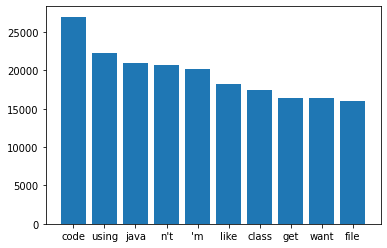

In [0]:
x = dict(sorted(keydict_jv.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(*zip(*x.items()))
plt.show()

Frequent keywords in Python

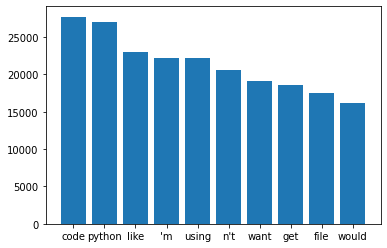

In [0]:
x = dict(sorted(keydict_py.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(*zip(*x.items()))
plt.show()

Frequent keywords in JavaScript

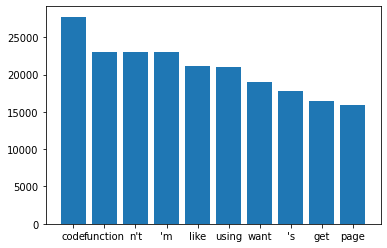

In [0]:
x = dict(sorted(keydict_js.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(*zip(*x.items()))
plt.show()

#### 3. Accepted Answers

The questions that have accepted answers would have non-null value in the column `AcceptedAnswerId`. So, for each file, we count such rows and divide by the total to get the percentage of questions with accepted answers.

In [0]:
def accepted_answers_percent(pyspark_df):
  """
  Function to return percentage of accepted answers
  """
  total_ques = pyspark_df.count()
  ques_with_accepted_answers = pyspark_df.filter(pyspark_df['AcceptedAnswerId'].isNotNull()).count()
  
  return ques_with_accepted_answers/total_ques


# getting percentage of accepted answers in each programming language
print("Percentage of accepted answers in\n {:<10} : {:.2f} %\n {:<10} : {:.2f} %\n {:<10} : {:.2f} %"
      .format("Java", accepted_answers_percent(df_jv_4)*100,
              "Python", accepted_answers_percent(df_py_4)*100,
              "JavaScript", accepted_answers_percent(df_js_4)*100))

Percentage of accepted answers in
 Java : 50.09 %
 Python : 51.10 %
 JavaScript : 55.30 %

#### 4. Types of Questions

The data on the question asked is available in the column `Title_lower` in each of the file. We don't need to lookup further details of the questions in the `Body` or any of its processed column.

To see the type of the question, we can determine how the question starts.

The following is the list of interrogative words from wikipedia -
  > what  
  > which  
  > when  
  > where  
  > who  
  > whom  
  > whose  
  > why  
  > whether  
  > how

For the purpose of this assignment, we would categorize the questions into four categories - *how*, *what*, *why*, and *other* (for everything else)

In [0]:
def question_types(pyspark_df):
  """
  Function to count the number of types of questions
  """
  count_how = 0
  count_what = 0
  count_why = 0
  count_other = 0
  count_total = pyspark_df.count()
  
  count_how = pyspark_df.filter(pyspark_df['Title_lower'].startswith("how")).count()
  count_what = pyspark_df.filter(pyspark_df['Title_lower'].startswith("what")).count()
  count_why = pyspark_df.filter(pyspark_df['Title_lower'].startswith("why")).count()
  count_other = pyspark_df.count() - count_how - count_what - count_why
  
  return (count_how/count_total, count_what/count_total, count_why/count_total, count_other/count_total)


# What types of questions for java
how, what, why, other = question_types(df_jv_4)
print("\nJava -\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %"
      .format("Questions starting with \'how\'", how*100,
              "Questions starting with \'what\'", what*100,
              "Questions starting with \'why\'", why*100,
              "Other questions", other*100))

# What types of questions for python
how, what, why, other = question_types(df_py_4)
print("\nPython -\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %"
      .format("Questions starting with \'how\'", how*100,
              "Questions starting with \'what\'", what*100,
              "Questions starting with \'why\'", why*100,
              "Other questions", other*100))

# What types of questions for javascript
how, what, why, other = question_types(df_js_4)
print("\nJavaScript -\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %\n{:<30} = {:05.2f} %"
      .format("Questions starting with \'how\'", how*100,
              "Questions starting with \'what\'", what*100,
              "Questions starting with \'why\'", why*100,
              "Other questions", other*100))

Java -
Questions starting with 'how' = 18.31 %
Questions starting with 'what' = 01.92 %
Questions starting with 'why' = 02.51 %
Other questions = 77.27 %

Python -
Questions starting with 'how' = 19.40 %
Questions starting with 'what' = 01.31 %
Questions starting with 'why' = 02.12 %
Other questions = 77.16 %

JavaScript -
Questions starting with 'how' = 18.65 %
Questions starting with 'what' = 01.21 %
Questions starting with 'why' = 02.00 %
Other questions = 78.13 %